In [2]:
# 📌 Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

In [12]:
# Caminho do dataset tratado
file_path = "../dataset/results/ObesityDataSet_cleaned.csv"

# Carregar os dados
df = pd.read_csv(file_path)

# Verificar se o dataset foi carregado corretamente
print("✅ Dataset carregado com sucesso!")
print(df.head())


✅ Dataset carregado com sucesso!
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  29.0    Male    1.62    53.0   Sometimes  yes   2.0  3.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes             Automobile   

     

In [10]:
# 📌 Verificar valores nulos
print("\n🔍 Verificando valores nulos:")
print(df.isnull().sum())

# 📌 Remover valores nulos se existirem
df = df.dropna()
print("\n✅ Dataset atualizado após remoção de valores nulos!")


🔍 Verificando valores nulos:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

✅ Dataset atualizado após remoção de valores nulos!


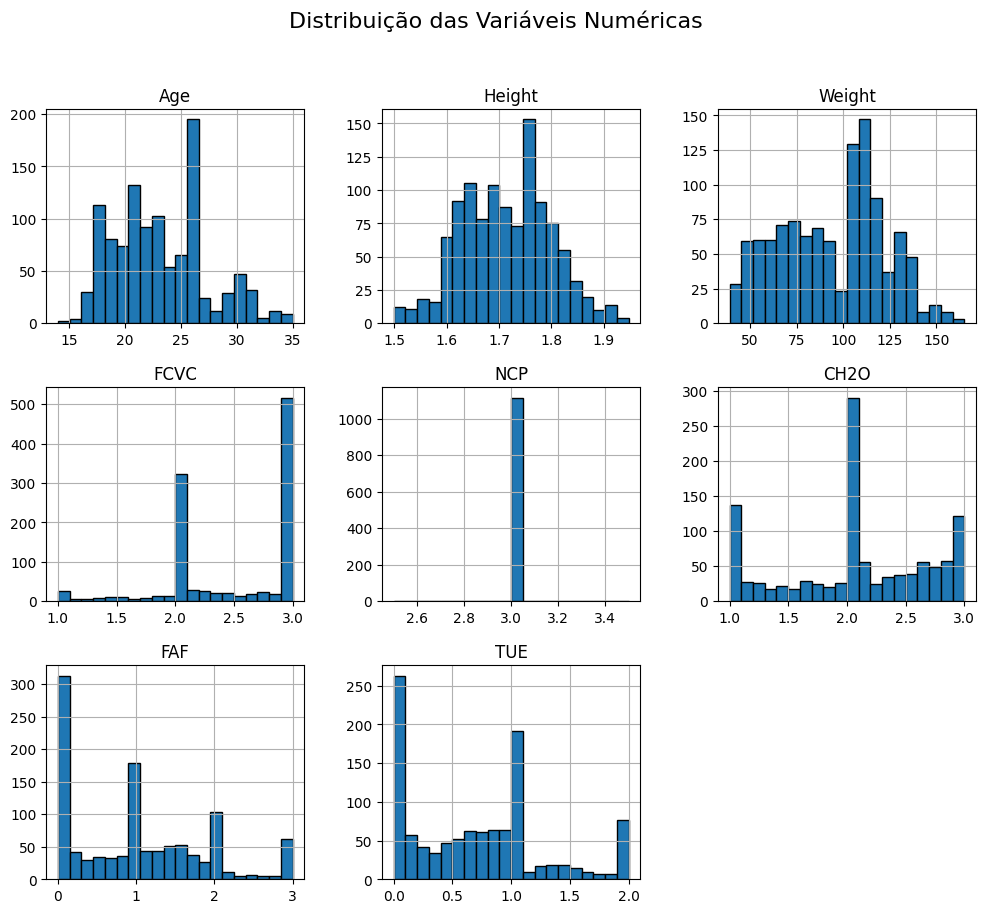

In [13]:
# 📌 Plotar histogramas das variáveis numéricas
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()


In [14]:
# 📌 Normalização (MinMaxScaler para manter distribuição e reduzir outliers)
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\n✅ Normalização concluída!")
print(df.head())




✅ Normalização concluída!
        Age  Gender    Height    Weight        CALC FAVC  FCVC  NCP  SCC  \
0  0.333804  Female  0.270559  0.198323          no   no   0.5  0.0   no   
1  0.333804  Female  0.047765  0.134859   Sometimes   no   1.0  0.0  yes   
2  0.429177    Male  0.671588  0.301450  Frequently   no   0.5  0.0   no   
3  0.619922    Male  0.671588  0.380779  Frequently   no   1.0  0.0   no   
4  0.715295    Male  0.270559  0.111061   Sometimes  yes   0.5  0.0   no   

  SMOKE  CH2O family_history_with_overweight       FAF  TUE       CAEC  \
0    no   0.5                            yes  0.000000  0.5  Sometimes   
1   yes   1.0                            yes  1.000000  0.0  Sometimes   
2    no   0.5                            yes  0.666667  0.5  Sometimes   
3    no   0.5                             no  0.666667  0.0  Sometimes   
4    no   0.5                             no  0.000000  0.0  Sometimes   

                  MTRANS          NObeyesdad  
0  Public_Transportation

In [ ]:
# 📌 Verificar distribuição da variável alvo
print("\n📊 Distribuição da variável alvo:")
print(df["NObeyesdad"].value_counts())


📊 Distribuição da variável alvo:
NObeyesdad
Obesity_Type_III       323
Normal_Weight          195
Obesity_Type_II        168
Obesity_Type_I         149
Overweight_Level_I      96
Overweight_Level_II     92
Insufficient_Weight     92
Name: count, dtype: int64


C:\Users\Matheus\AppData\Local\Temp\ipykernel_13852\887611800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="pastel")


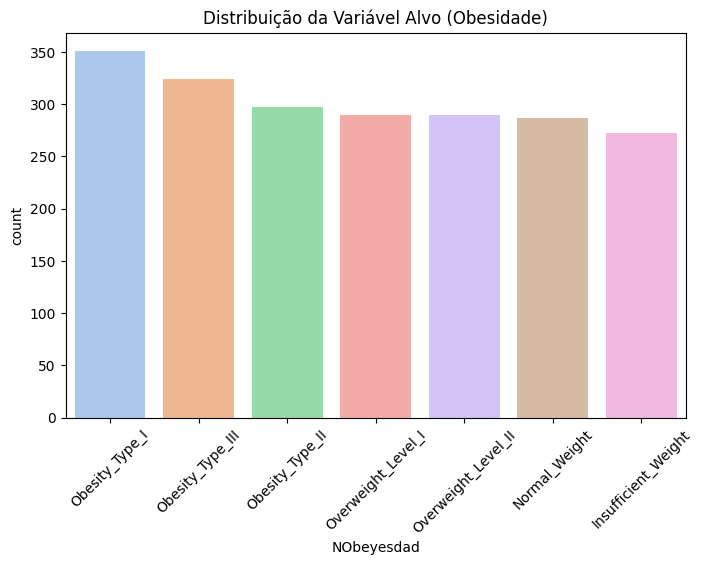

In [14]:

# 📌 Plotar a distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.countplot(x=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribuição da Variável Alvo (Obesidade)")
plt.show()

In [33]:
# 📌 Aplicar One-Hot Encoding nas variáveis categóricas
categorical_cols = [
    "Gender", "CALC", "FAVC", "SCC", "SMOKE",
    "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 📌 Conferir novas colunas geradas
print("\n🔍 Novas colunas após One-Hot Encoding:")
print(df_encoded.columns)



🔍 Novas colunas após One-Hot Encoding:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'CALC_Sometimes', 'CALC_no', 'FAVC_yes', 'SCC_yes',
       'SMOKE_yes', 'family_history_with_overweight_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


In [34]:
# 📌 Normalizar novamente os dados após One-Hot Encoding (exceto as variáveis categóricas)
numerical_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("\n✅ Dados normalizados após One-Hot Encoding!")


✅ Dados normalizados após One-Hot Encoding!


In [38]:
# 📌 Identificar todas as variáveis alvo relacionadas à obesidade
target_cols = [col for col in df.columns if 'Obesity' in col or 'NObeyesdad' in col or 'Target_Class' in col]

# 📌 Exibir colunas alvo identificadas
print("\n🎯 Variáveis alvo disponíveis:", target_cols)


🎯 Variáveis alvo disponíveis: ['NObeyesdad']


In [21]:
# 📌 Aplicar Label Encoding para que o SMOTE funcione
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
# 📌 Aplicar SMOTE para balancear as classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)


In [42]:
# 📌 Criar novo DataFrame balanceado
df_balanced = pd.concat(
    [pd.DataFrame(X_resampled, columns=X.columns),
     pd.DataFrame(y_resampled, columns=["Target_Class"])],
    axis=1
)

In [43]:
# 📌 Criar um dicionário para mapear os índices para os nomes originais das classes
label_map = {i: label for i, label in enumerate(le.classes_)}

In [44]:
# 📌 Aplicar o mapeamento para restaurar os nomes das classes
df_balanced["Target_Class"] = df_balanced["Target_Class"].map(label_map)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_304\1334497834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_balanced["Target_Class"], palette="pastel")


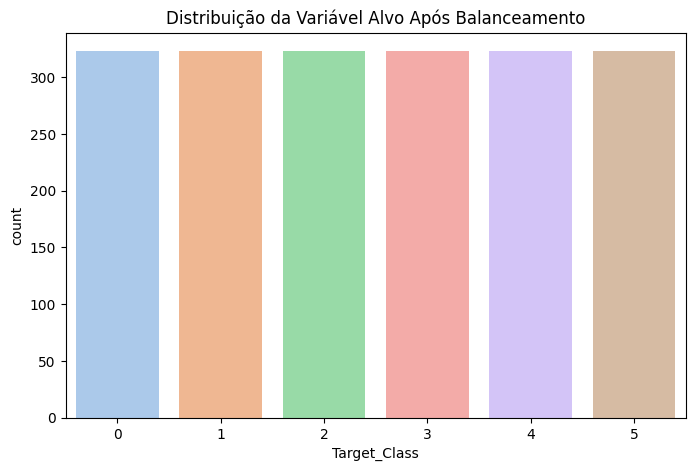


✅ Balanceamento concluído!
Target_Class
0    323
4    323
1    323
5    323
2    323
3    323
Name: count, dtype: int64


In [39]:
# 📌 Conferir distribuição da variável alvo após o balanceamento
plt.figure(figsize=(8, 5))
sns.countplot(x=df_balanced["Target_Class"], palette="pastel")
plt.title("Distribuição da Variável Alvo Após Balanceamento")
plt.show()

print("\n✅ Balanceamento concluído!")
print(df_balanced["Target_Class"].value_counts())

In [45]:
print("\n🔍 Verificando todas as colunas do DataFrame:")
print(df.columns.tolist())  # Lista todas as colunas disponíveis


🔍 Verificando todas as colunas do DataFrame:
['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [47]:

# 📌 Salvar o Dataset Tratado
output_path = "../dataset/results/ObesityDataSet_prepared.csv"
df_balanced.to_csv(output_path, index=False)

print("\n📁 Dataset final salvo como 'ObesityDataSet_prepared.csv'")


📁 Dataset final salvo como 'ObesityDataSet_prepared.csv'
